<a href="https://colab.research.google.com/github/Willslva/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Hong_Kong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Hong Kong

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Hong Kong, e ver quais insights podem ser extraídos a partir de dados brutos.**

#Overview de Hong Kong

Como um dos principais centros financeiros internacionais, Hong Kong tem uma grande economia de serviço capitalista caracterizada pelo baixo nível de impostos e pelo livre comércio, sendo que a sua moeda, o dólar de Hong Kong, é a oitava mais negociada no mundo. 

Hong Kong tem várias boas colocações em classificações internacionais de vários temas. Por exemplo, sua liberdade e competitividade econômica e financeira, qualidade de vida, percepção de corrupção e Índice de Desenvolvimento Humano (IDH) estão todos classificados nas mais altas posições.

<center><img alt="Hong Kong vista do Victoria Peak em 2019" width="80%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Hong_Kong_Harbour_Night_2019-06-11.jpg/800px-Hong_Kong_Harbour_Night_2019-06-11.jpg"></center>

É preciso levar em conta o que fazer em Hong Kong com chuva, porque durante o verão, o calor e a umidade são intensos. A época mais chuvosa do ano vai de maio a setembro, e justamente por isso a época é considerada baixa temporada. 

Durante os meses de junho e setembro podem ocorrer ciclones, tufões, tempestades de vento e temporais na cidade, mas é apenas uma possibilidade, não uma certeza. O período mais seco vai de novembro a fevereiro.

**Mas afinal quando ir em Hong Kong?** 
Uma boa dica seria viajar entre os meses de outubro e janeiro, assim você não tem que encarar o calor excessivo do verão e nem o ar seco do inverno. Mas se quiser economizar e confiar na sorte, a melhor época é de maio a setembro.



# Importando Pacotes
Todos os dados utilizados aqui foram obtidos a partir do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* 'listings.csv' - Summary information and metrics for listings Hong Kong

In [ ]:
# importar os pacotes necessarios
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# configurando a visualização
sns.set_style()
%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/china/hk/hong-kong/2021-10-22/visualisations/listings.csv")

# Dicionário das Variáveis



**Variáveis referentes ao proprietário**
* host_id - número do identificador do proprietário do imóvel
* host_name - nome do proprietário
* calculated_host_listings_count - quantidade de imóveis do mesmo proprietário

**Variáveis referentes ao imóvel**
* id - número do identificador do imóvel
* name - nome da propriedade anunciada
* room_type - tipo do quarto que é oferecido
* price - preço para alugar o imóvel
* mininum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data da última review
* reviews_per_month - quantidade de reviews por mês
* availability_365 - número de dias de disponibilidade do imóvel dentro de 365 dias 
* number_of_reviews_ltm - número de comentários realizado para o imóvel

**Variáveis referentes a localização do imóvel**
* neighbourhood_group - essa coluna não tem valores válidos
* license - essa coluna não tem valores válidos
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade









Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

Antes de iniciar de análise dos dados importados é importante saber quais perguntas devemos responder durante nosso caminho de descobertas. A seguir é apresentado as perguntas que foram formaladas para o presente estudo, que serão respondidas por meio da análise exploratória dos dados do Airbnb referente a Hong Kong.

* **`Q1.Quantas entradas e variáveis (colunas do dataset) o conjunto de dados possui? E quais os tipos de variáveis?`**
* **`Q2.Qual a porcentagem de valores ausentes no dataset?`**
* **`Q3.Há outliers?`**
* **`Q4.Qual a média de preços de imóveis alugados?`**
* **`Q5.Qual o tipo de imóvel mais alugado?`**
* **`Q6.Quais os bairros mais caros e baratos disponíveis em Hong Kong?`**
* **`Q7.Qual o mínimo de noites de hospedagem?`**
* **`Q8.Como está distribuido por localidade os bairros que hospedam turistas em Hong Kong?`**

# Explorando o Dataset

**Quantas entradas e variáveis (colunas do dataset) o conjunto de dados possui? E quais os tipos de variáveis?`**

<p>Identificamos que nosso conjunto de dados tem 6084 entradas e possui 18 colunas (variáveis).</p>

O próximo passo é verificar se todas nossas variáveis tem de fato o tipo correto de dado. Em relação a isso foi notado que todas as variáveis estavam com seus tipos de dados corretos, exceto a variável **last_review** sendo a data da última review com **objeto** que é tipo de dado recomendado para variáveis que guarda conteúdo textual.

Então foi modificado o tipo de dado de **last_review** para 
**datetime64** que é o tipo correto de dado para a mesma.


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17891,Large Light Filled Loft,69063,Candace,NaN,Central & Western,22.28327,114.14988,Entire home/apt,1400,60,73,2017-11-29,1.07,1,0,0,NaN
1,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28350,114.14854,Entire home/apt,1497,2,135,2019-08-03,1.19,1,131,1,NaN
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28418,114.15431,Entire home/apt,614,2,274,2019-11-17,3.05,9,247,2,NaN
3,104626,Entire Flat - Next to Man Mo Temple,544166,Celine,NaN,Central & Western,22.28360,114.14790,Entire home/apt,2533,1,14,2012-01-13,0.12,1,365,0,NaN
4,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28921,114.14325,Entire home/apt,847,2,209,2020-08-07,2.45,9,144,2,NaN


In [ ]:
# mostrar as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6079,52909143,A 2ppl Double Bed HKManStudio 1min CausewayBay...,25048995,Moey,NaN,Wan Chai,22.280871,114.184678,Private room,270,1,0,NaN,NaN,17,41,0,NaN
6080,52909688,尖沙咀地鐵口實惠床位,99505769,Cc,NaN,Yau Tsim Mong,22.298899,114.172201,Private room,62,30,0,NaN,NaN,5,359,0,NaN
6081,52909988,A 2ppl Double Bed HKManStudio 1min CausewayBay...,25048995,Moey,NaN,Wan Chai,22.279056,114.184477,Private room,270,28,0,NaN,NaN,17,365,0,NaN
6082,52925818,Luxury Bali living in Hong Kong,24613748,Jeff,NaN,Wan Chai,22.267564,114.181842,Entire home/apt,5000,2,0,NaN,NaN,1,8,0,NaN
6083,52929649,Full House with pool and amazing outside area,51790133,Remi,NaN,Sai Kung,22.303349,114.296364,Entire home/apt,5000,5,0,NaN,NaN,1,96,0,NaN


In [ ]:
# identificar o volume de dados do DataFrame
print ("Entradas:\t {}".format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
df.info()

Entradas:	 6084
Variáveis:	 18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6084 non-null   int64  
 1   name                            6083 non-null   object 
 2   host_id                         6084 non-null   int64  
 3   host_name                       6084 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6084 non-null   object 
 6   latitude                        6084 non-null   float64
 7   longitude                       6084 non-null   float64
 8   room_type                       6084 non-null   object 
 9   price                           6084 non-null   int64  
 10  minimum_nights                  6084 non-null   int64  
 11  number_of_reviews               6084 non-null   int64  
 12  la

In [ ]:
# modificando o tipo de dado de last_review para datetime64
df.last_review = pd.to_datetime(df.last_review, format="%Y/%m/%d")


# Limpeza do Dataset

**Qual a porcentagem de valores ausentes no dataset?**

A qualidade de um dataset esta direcionada relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` e `license` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 49% das linhas.
* As variáveis `name`  têm aproximadamente 0,1% dos valores nulos.

Foi decidido excluir as colunas `neighbourhood_group` e `license`, e essa ação não reduziria o número de entradas permanecendo 6084 entradas. Todavia foi excluido as linhas que tivesse valores ausentes e nosso dataset possui atualmente 2975 entradas.



### **Valores Ausentes**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.510848
last_review                       0.510848
name                              0.000164
longitude                         0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

In [ ]:
# mostrando quantidade de valores ausentes por variável
(df.isnull().sum()).sort_values(ascending=False)

license                           6084
neighbourhood_group               6084
reviews_per_month                 3108
last_review                       3108
name                                 1
longitude                            0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
room_type                            0
number_of_reviews_ltm                0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
id                                   0
dtype: int64

In [ ]:
# Excluindo colunas sem valores válidos para a análise
df.drop(columns=['neighbourhood_group','license'], inplace=True)

# Excluindo linhas com valores ausentes
df.dropna(axis=0, inplace=True)

### **Outliers** 

**Há outliers?**

Pela distribuição do histograma, é possível verificar indícios da presençã de *outliers*. Olhe por exemplo as variáveis `price` e `minimum_nights`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar a suspeita, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`

* Plotar `boxplots` para a variável.

Em relação a plotagem de **boxplots** referentes as **variáveis suspeitas** foi adotado a estratégia conhecida como **IQR Scores** para definir os **limites superiores e inferiores** de cada variável suspeita, com a finalidade de usar os limites para **definir o corte e remover os outliers**.

Assim sendo foi definido para as variáveis `price` e `minimum_nights`: **quartile 1 (Q1) que é o 25%**, **o quartile 3 (Q3) que é o 75%** e o resultado da **IQR**.

Depois de realizar o **IQR Scores** nas duas variáveis foram adquiridas as seguintes informações:

* `price`
<p> A mediana dos preços é 550.0 </p>
<p> É preciso excluir preços que estejam a cima de 1675.0 e isso corresponde excluir 270 entradas, tal ação corresponde percentualmente a exclusão de 9.08% do dataset.</p>
<p> Além disso é preciso excluir preços que tenha o valor 0.0, porque não tem reserva de hospedagem custando 0.0 .</p>

* `minimum_nights`
<p> A mediana do mínimo de noites é 6.0 .</p>
<p> É preciso excluir mínimo de noites que ultrapasse o valor 16.0, e resultará em excluir 548 entradas ocasionando 18.42% do dataset para a lixeira.</p>



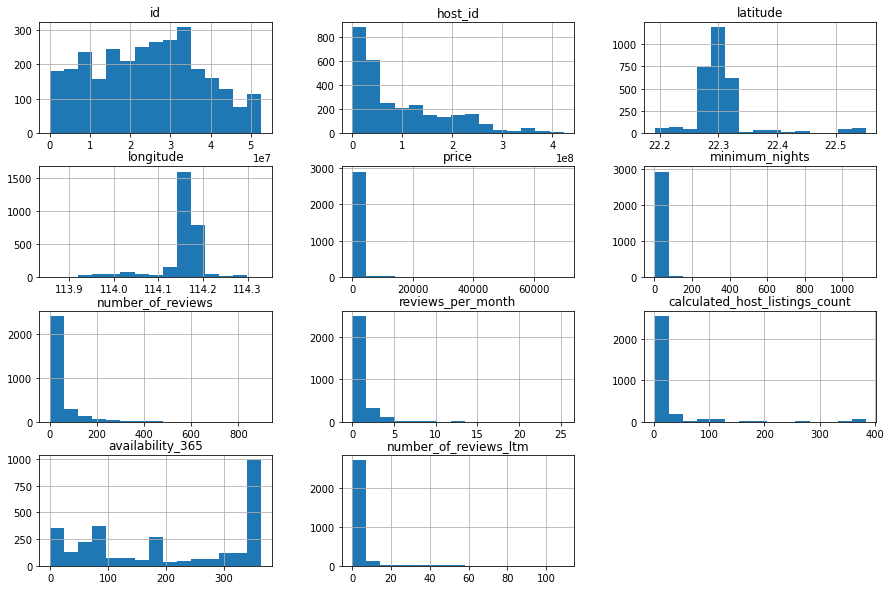

In [ ]:
# plotar o histograma das variáveis numéricas para entender a distribuição das variáveis
df.hist(bins=15, figsize=(15,10));

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.975000e+03,2.975000e+03,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000
mean,2.440928e+07,9.569492e+07,22.308010,114.155385,950.109244,9.681345,35.810756,0.851368,23.790588,205.309244,2.825882
std,1.343600e+07,9.270956e+07,0.053759,0.055363,2274.512970,30.969581,60.571523,1.304726,63.807984,138.501425,9.618300
min,1.789100e+04,6.906300e+04,22.191120,113.856530,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.367402e+07,2.343832e+07,22.284245,114.153610,300.000000,1.000000,2.000000,0.100000,2.000000,79.000000,0.000000
50%,2.482411e+07,5.657014e+07,22.298790,114.170910,480.000000,1.000000,10.000000,0.360000,6.000000,180.000000,0.000000
75%,3.400717e+07,1.515277e+08,22.316185,114.173725,850.000000,7.000000,41.000000,1.060000,16.000000,363.000000,1.000000
max,5.265662e+07,4.227994e+08,22.551610,114.331160,69967.000000,1125.000000,898.000000,25.330000,384.000000,365.000000,109.000000


### **Identificando outliers para variável price**


In [ ]:
# definindo quartile 1 (Q1) que é o 25%, definindo quartile 3 (Q3) que é o 75% e obtendo por fim o resultado da IQR
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
iqr_price = q3_price - q1_price
print ("O IQR de price é: ", iqr_price)

# definindo os limites superior e inferior da variável
sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price

print ("O limite superior é: ", sup_price)
print ("O limite inferior é: ", inf_price)


O IQR de price é:  550.0
O limite superior é:  1675.0
O limite inferior é:  -525.0


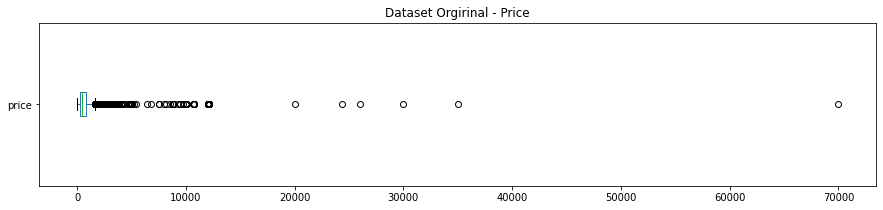

 O dataset possui 2975 entradas
 270 Entradas acima de 1675.0
 Representam 9.08% do dataset


In [ ]:
# verificando conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Price')
plt.show()
print(" O dataset possui {} entradas".format(df.shape[0]))
print(" {} Entradas acima de 1675.0".format(len(df[df.price > 1675.0])))
print(" Representam {:.2f}% do dataset".format((len(df[df.price > 1675.0]) / df.shape[0])*100))

### **Identificando outliers para variável  minimum_nights**

In [ ]:
# definindo quartile 1 (Q1) que é o 25%, definindo quartile 3 (Q3) que é o 75% e obtendo por fim o resultado da IQR
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights
print ("O IQR de minimum_nights é: ", iqr_minimum_nights)

# definindo os limites superior e inferior da variável
sup_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights

print ("O limite superior é: ", sup_minimum_nights)
print ("O limite inferior é: ", inf_minimum_nights)


O IQR de minimum_nights é:  6.0
O limite superior é:  16.0
O limite inferior é:  -8.0


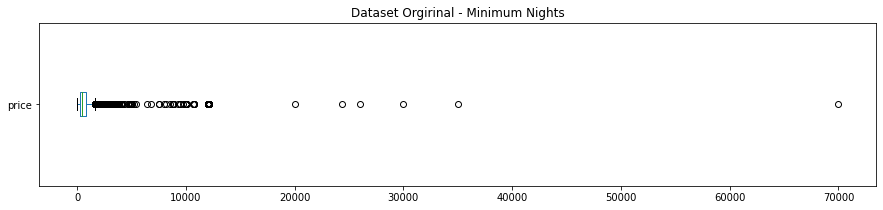

 O dataset possui 2975 entradas
 548 Entradas acima de 16.0
 Representam 18.42% do dataset


In [ ]:
# verificando conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Minimum Nights')
plt.show()
print(" O dataset possui {} entradas".format(df.shape[0]))
print(" {} Entradas acima de 16.0".format(len(df[df.minimum_nights > 16.0])))
print(" Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 16.0]) /df.shape[0])*100))

### **Excluindo outiliers**

In [ ]:
# excluindo outiliers do dataset
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1675.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 16.0].index, axis=0, inplace=True)

print("Shape antes da limpeza: ", df.shape)
print("Shape após a limpeza: ", df_clean.shape)

Shape antes da limpeza:  (2975, 16)
Shape após a limpeza:  (2184, 16)


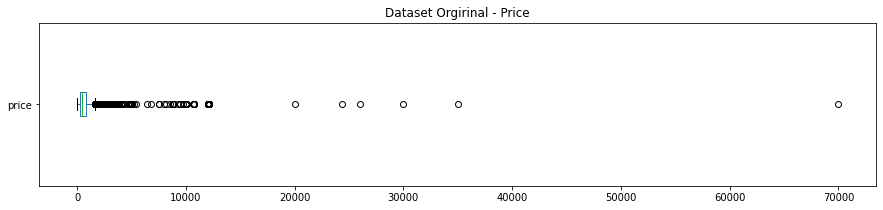

O dataset possui 2975 entradas
 270 Entradas acima de 1675.0
 Representam 9.08% do dataset


In [ ]:
# verificando conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Price')
plt.show()
print("O dataset possui {} entradas".format(df.shape[0]))
print(" {} Entradas acima de 1675.0".format(len(df[df.price > 1675.0])))
print(" Representam {:.2f}% do dataset".format((len(df[df.price > 1675.0]) / df.shape[0])*100))

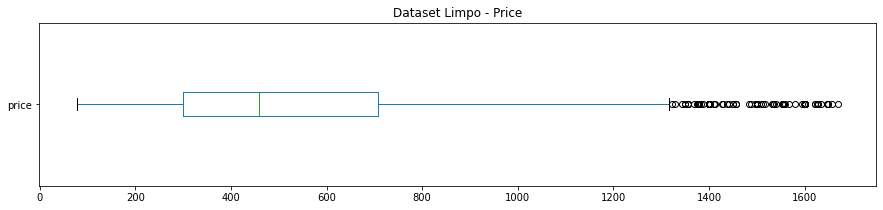

O dataset possui 2184 entradas
 0 Entradas acima de 1675.0
 Representam 0.00% do dataset


In [ ]:
# verificando conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind="box", vert=False)
ax.set_title('Dataset Limpo - Price')
plt.show()
print("O dataset possui {} entradas".format(df_clean.shape[0]))
print(" {} Entradas acima de 1675.0".format(len(df_clean[df_clean.price > 1675.0])))
print(" Representam {:.2f}% do dataset".format((len(df_clean[df_clean.price > 1675.0]) / df_clean.shape[0])*100))

In [ ]:
# Verificando as distribuições do conjunto limpo
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.184000e+03,2.184000e+03,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,2.463395e+07,1.012050e+08,22.311055,114.155091,556.802656,2.224359,39.912088,0.930664,11.887821,196.759615,3.155678
std,1.326543e+07,9.303130e+07,0.058134,0.054701,342.130357,2.575481,62.807244,1.354606,18.743849,138.727310,10.488767
min,6.907400e+04,1.601390e+05,22.191120,113.856530,78.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.387723e+07,2.814068e+07,22.285545,114.153425,300.000000,1.000000,3.000000,0.130000,2.000000,71.000000,0.000000
50%,2.527044e+07,5.694983e+07,22.299590,114.171010,459.000000,1.000000,13.000000,0.450000,6.000000,180.000000,0.000000
75%,3.416487e+07,1.635578e+08,22.316617,114.173492,707.000000,2.000000,48.000000,1.190000,14.000000,359.250000,2.000000
max,5.265662e+07,4.227994e+08,22.551610,114.331160,1670.000000,15.000000,898.000000,25.330000,186.000000,365.000000,109.000000


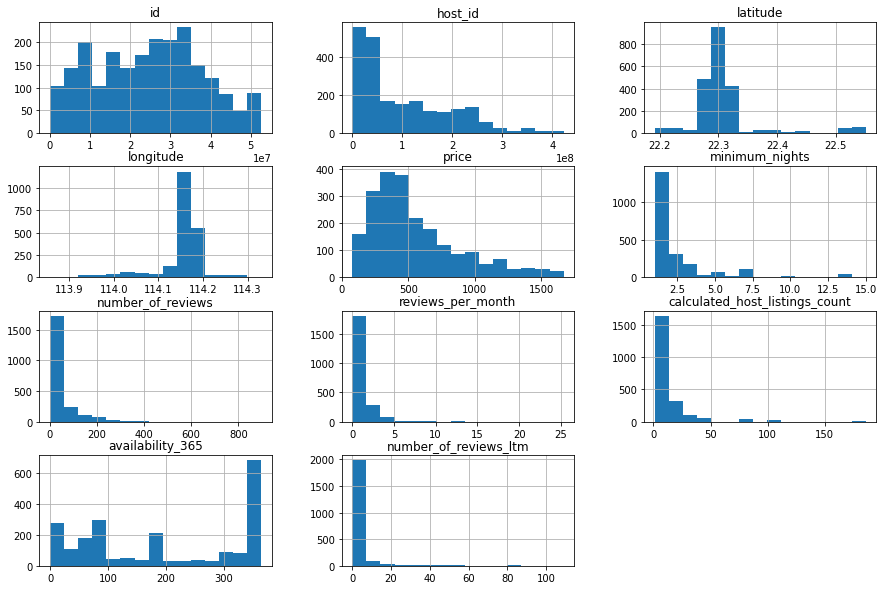

In [ ]:
# Verificando as distribuições estatísticas dos dados limpos
df_clean.hist(bins=15, figsize=(15,10));

# Análise Exploratória

### **Média de Preços de imóveis alugados**

**Qual a média de preços de imóveis alugados?**




In [ ]:
# ver a média da coluna price
df_clean.price.mean()

556.8026556776557

### **Tipo de imóvel mais alugado**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
df_clean.room_type.value_counts()

Private room       1107
Entire home/apt     865
Shared room         138
Hotel room           74
Name: room_type, dtype: int64

**Qual o tipo de imóvel mais alugado?**

* É possível perceber que o aluguel de um quarto  (`Private room`) é o tipo de imóvel mais alugado correspondendo aproximadamente 50% das hospedagem realizadas pelo Airbnb em Hong Kong. 
* Já apartamentos/casas inteiras (`Entire home/apt`) é segunda melhor pontuada quando tratamos de tipo de imóvel alugado possuindo cerca de 39% da fatia de reservas realizadas.
* Para o pessoas que curtem viajar em grupo e se aventurar em dividir o quarto com outras pessoas (`Shared room`) saibam que esse tipo de hospedagem têm aproximadamente 0,6% de presença em hospedagens em Hong Kong.
* E a revelação da análise é que quarto em hotel (`Hotel room `) têm apenas 0,3% de hospedagens, assim sendo, número considerável de usuários ao acessar o Airbnb buscando alugar imóveis de anfitriões.

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
percentual_tipo_imovel = df_clean['room_type'].value_counts() / df_clean.shape[0]
print((df_clean['room_type'].value_counts() / df_clean.shape[0]))

Private room       0.506868
Entire home/apt    0.396062
Shared room        0.063187
Hotel room         0.033883
Name: room_type, dtype: float64


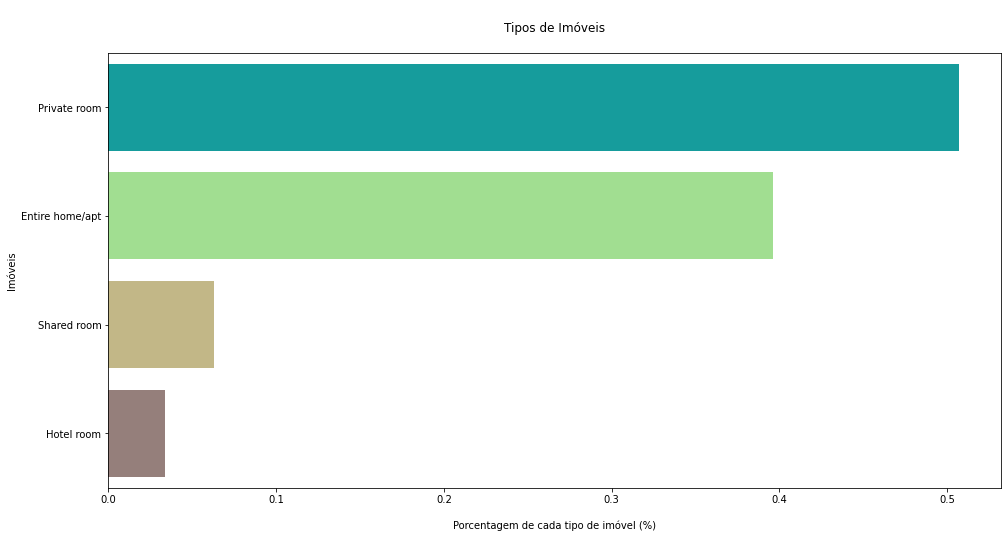

In [ ]:
plt.figure(figsize = (16,8))
sns.barplot(x = percentual_tipo_imovel.values, y = percentual_tipo_imovel.index, orient = "h", palette = "terrain")
plt.ylabel('Imóveis')             
plt.xlabel("\nPorcentagem de cada tipo de imóvel (%)")
plt.title('\nTipos de Imóveis\n')
plt.show()

### **Localidades mais caras**

**Quais os bairros mais caros e baratos disponíveis em Hong Kong?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Kwai Tsing           982.250000
Kwun Tong            953.200000
Islands              806.903030
Southern             752.250000
Central & Western    709.913043
Tsuen Wan            688.333333
Sai Kung             685.000000
Sham Shui Po         647.615385
Wong Tai Sin         633.000000
Kowloon City         613.867470
Name: price, dtype: float64

### **Localidades mais baratas**

In [ ]:
# ver os bairros mais baratos
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[10:]

neighbourhood
Wan Chai         607.587983
Tai Po           570.266667
Eastern          557.461538
North            488.968254
Yau Tsim Mong    471.922535
Tuen Mun         464.900000
Sha Tin          456.333333
Yuen Long        415.550000
Name: price, dtype: float64

### **Imóveis pela latitude-longitude**



**Como está distribuído por localidade os bairros que hospedam turistas em Hong Kong?**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x = longitude e y = latitude

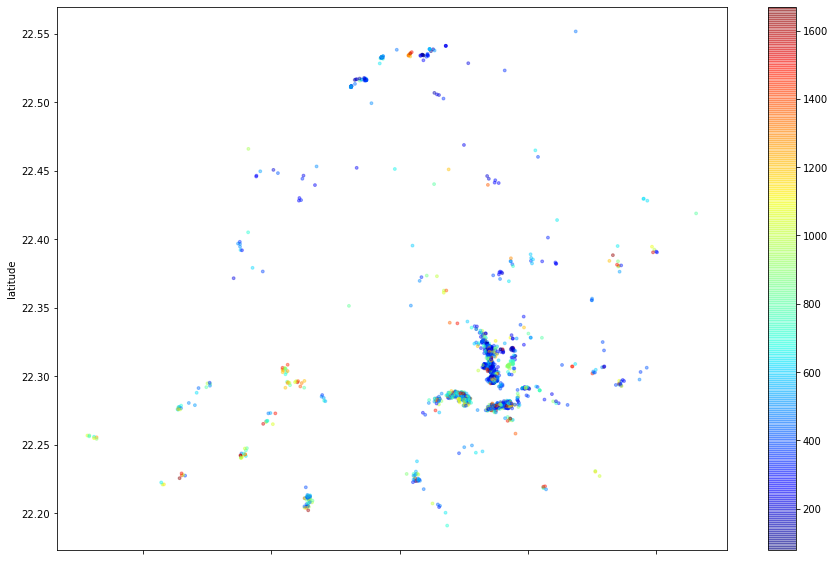

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(15,10));

### **A média do mínimo de noites de hospedagem**

**Qual a média de noites de hospedagem?**

Uma maneira de responder a pergunta é usando `mean()`. No caso, queremos saber a média de noites de hospedagem, assim sendo, saberemos o mínimo de noites.

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.2243589743589745

# Conclusões


A análise efetuada na base de dados do Airbnb conseguimos percebeu que existem *outliers* em algumas das variáveis, e número considerável de valores ausentes, assim sendo o dataset é composto de dados que podem distorcer as informações estatísticas de alguns atributos. 

Em um mercado movido a propriedades como Hong Kong, o Airbnb definitivamente ganhou popularidade. Hong Kong tem sido constantemente classificada entre as 10 cidades mais caras para se viver, um lugar com uma abundância de turistas preocupados com os custos.

Assim sendo, a análise disponibilizada oferece caminho para os turistas tomarem decisões em quais localidades se encaixam no orçamento para a viagem. 

Ademais, as perguntas respondidas no decorrer do caminho de análise exploratória oferece informação valiosa para conhecimento superficial a respeito da configuração do cenário de hospedagem da Airbnb em Hong Kong


